In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('winequalityred.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
print("Rows, column: " + str(df.shape))

Rows, column: (1599, 12)


In [4]:
#Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
print(df.values.size)

19188


In [6]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

<AxesSubplot:xlabel='quality'>

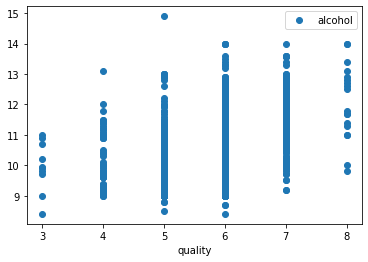

In [7]:
df.plot(x="quality", y="alcohol", style="o")

In [8]:
#Converting the output to binary (good 1/bad 0)
x = np.arange(1599*11.0).reshape(1599, 11)
y = np.arange(0,1599)
for i in range(0, 1599):
    if df.iat[i, 11] < 5:
        y[i] = 0
    else:
        y[i] = 1
    for j in range(0, 11):
        x[i, j] = df.iat[i, j]

x = StandardScaler().fit_transform(x)

"""
x = np.arange(1599*11.0).reshape(1599, 11)
y = np.arange(0,1599)
for i in range(0, 1599):
    y[i] = df.iat[i, 11]
    for j in range(0, 11):
        x[i, j] = df.iat[i, j]

x = StandardScaler().fit_transform(x)

"""
print(x)
print(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]
[1 1 1 ... 1 1 1]


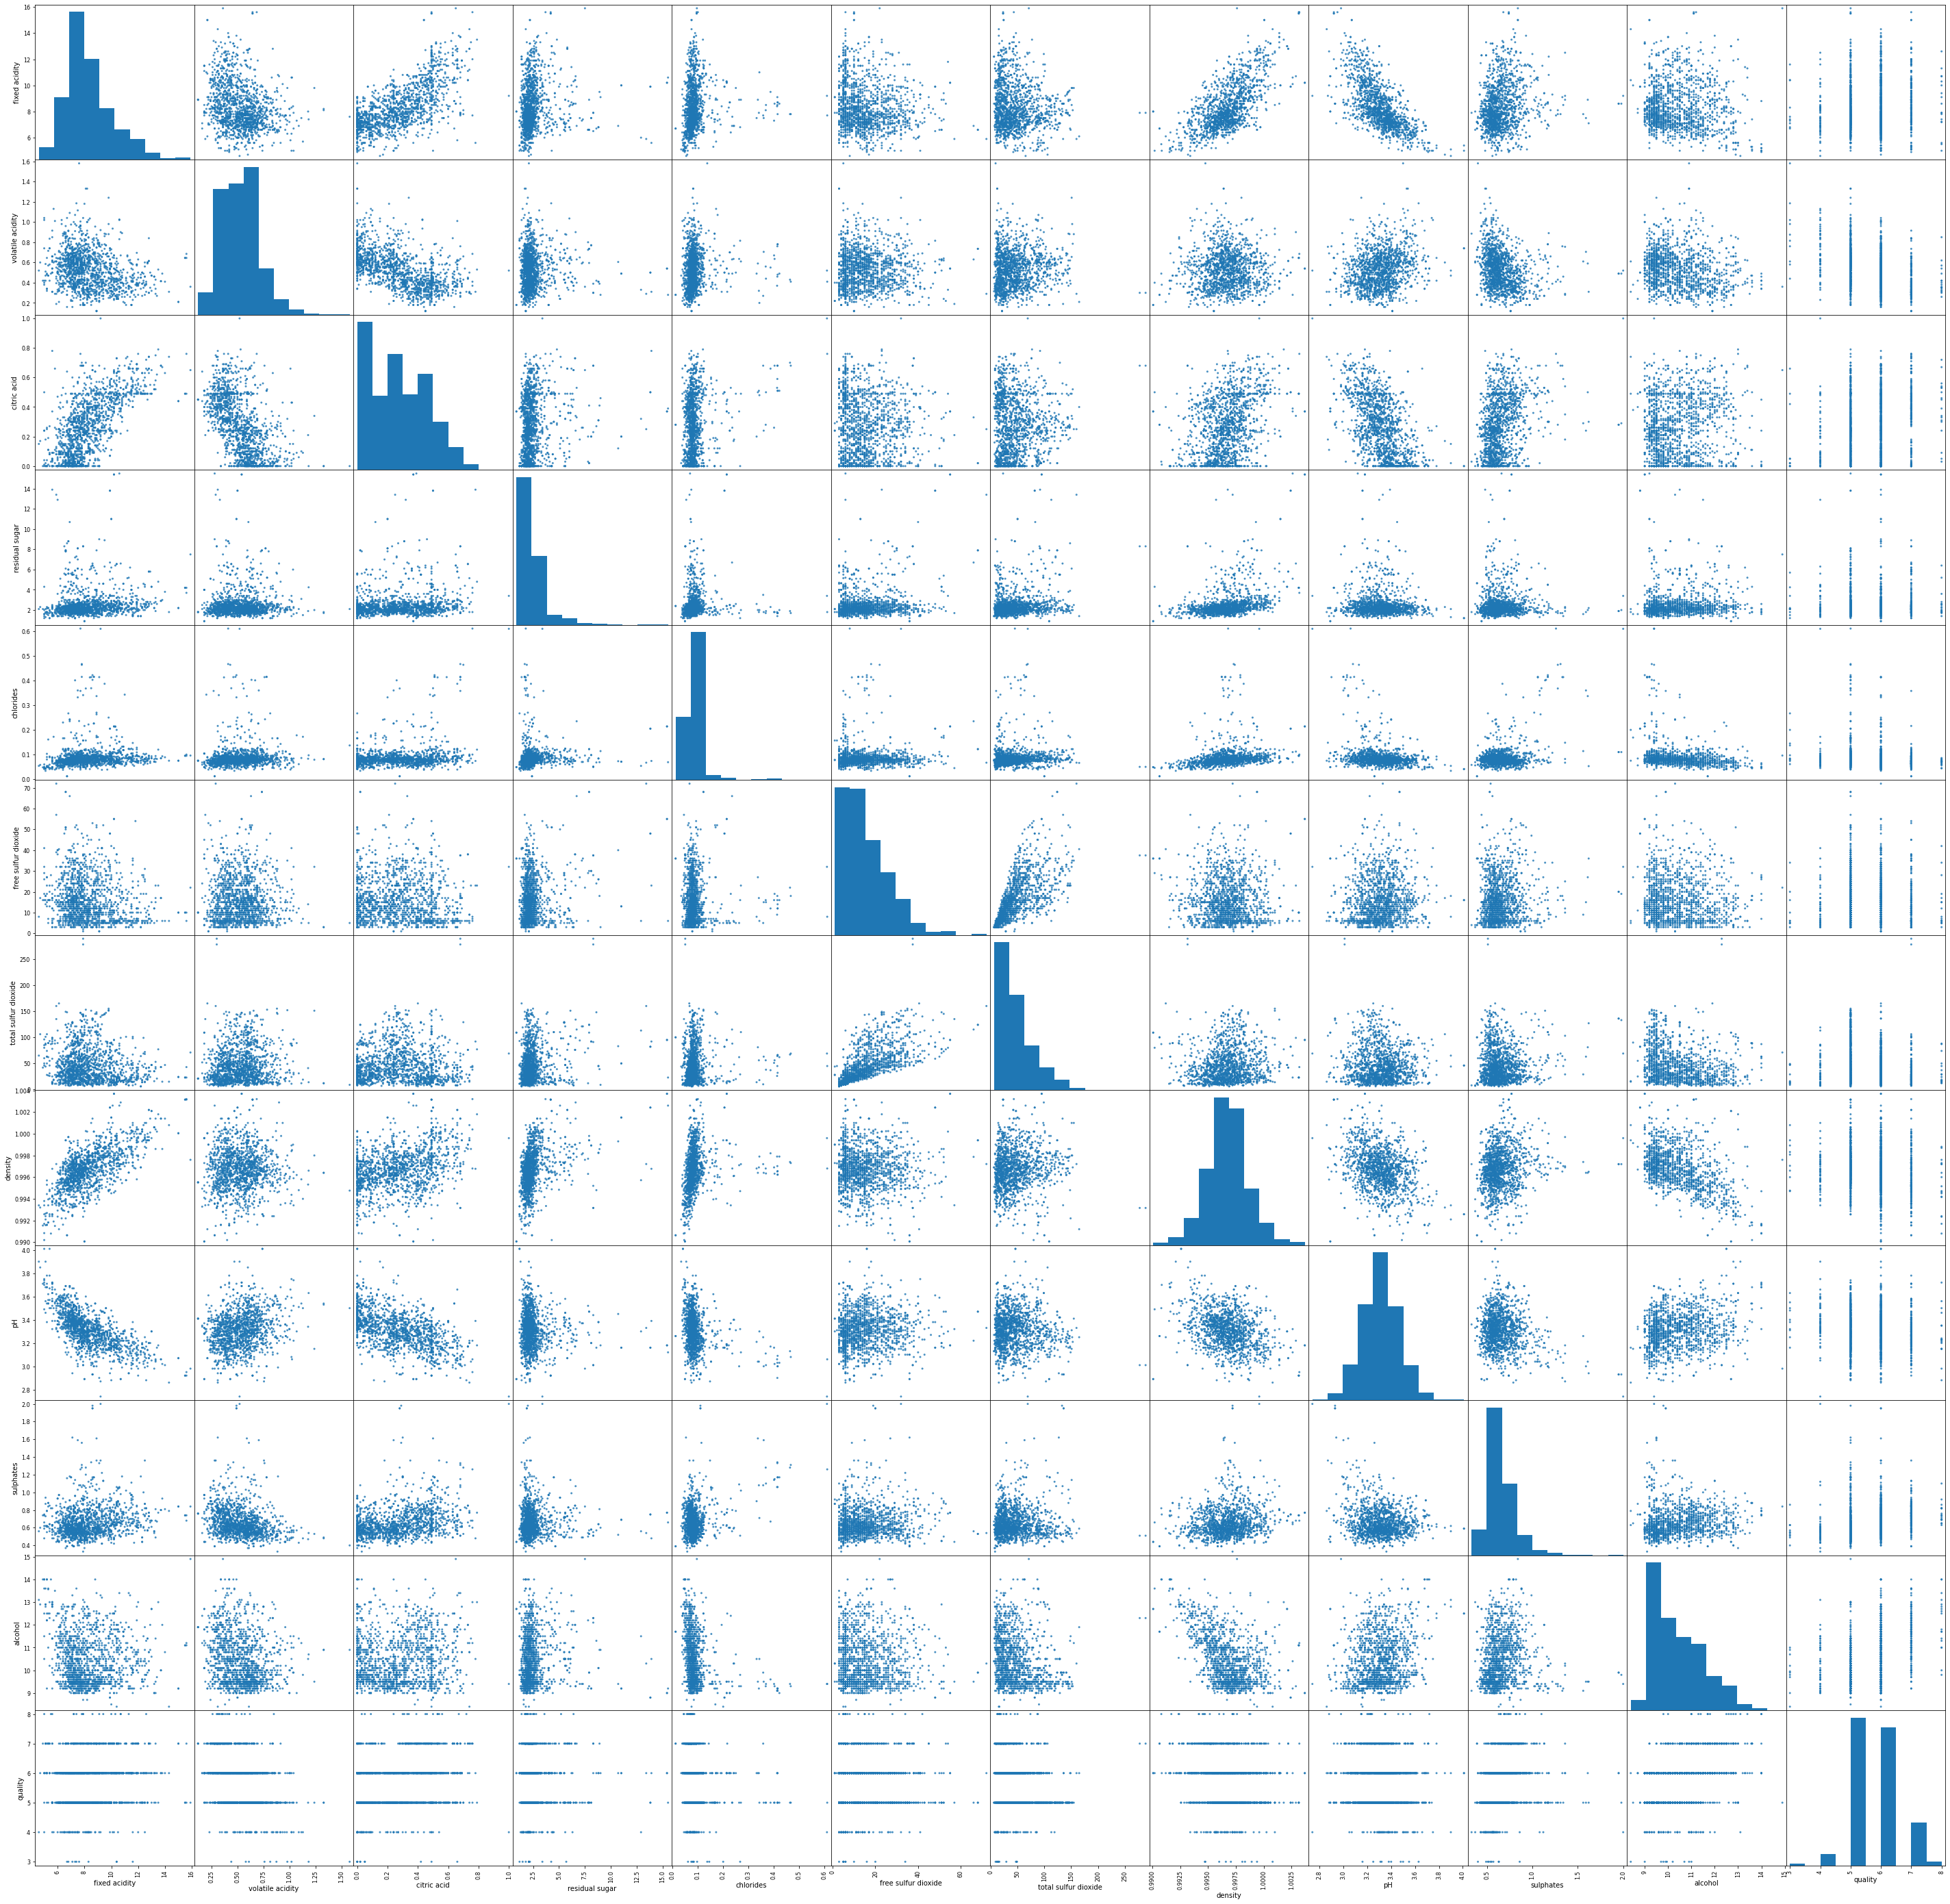

In [9]:
matrix = pd.plotting.scatter_matrix(df, figsize=(50,50), alpha=0.8)

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_predicted = knn.predict(X_test)
print(f"Test set predictions:\n {y_predicted}")

Test set predictions:
 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
redKNNScore = np.mean(y_predicted == y_test)
print("Test set score : {:.2f}".format(redKNNScore))

Test set score : 0.94


In [14]:
#print(classification_report(y_test, y_predicted, labels=[4,5,6,7]))
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.18      0.12      0.15        16
           1       0.96      0.98      0.97       384

    accuracy                           0.94       400
   macro avg       0.57      0.55      0.56       400
weighted avg       0.93      0.94      0.94       400



In [15]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter=150)
lr.fit(X_train, y_train)
ylr_predicted = lr.predict(X_test)
redlrScore = np.mean(ylr_predicted == y_test)
print("Test set score : {:.2f}".format(redlrScore))

Test set score : 0.96


In [16]:
#print(classification_report(y_test, ylr_predicted, labels=[4,5,6,7]))
print(classification_report(y_test, ylr_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.96      1.00      0.98       384

    accuracy                           0.96       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.92      0.96      0.94       400



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_train, y_train)
ydTree_predicted = dTree.predict(X_test)
redDTreeScore = np.mean(ydTree_predicted == y_test)
print("Test set score : {:.2f}".format(redDTreeScore))

Test set score : 0.93


In [18]:
#print(classification_report(y_test, ydTree_predicted, labels=[4,5,6,7,8]))
print(classification_report(y_test, ydTree_predicted))

              precision    recall  f1-score   support

           0       0.15      0.19      0.17        16
           1       0.97      0.96      0.96       384

    accuracy                           0.93       400
   macro avg       0.56      0.57      0.56       400
weighted avg       0.93      0.93      0.93       400



In [19]:
randomForest = RandomForestClassifier(random_state=1)
randomForest.fit(X_train, y_train)
yrf_predicted = randomForest.predict(X_test)
redRForestScore = np.mean(yrf_predicted == y_test)
print("Test set score : {:.2f}".format(redRForestScore))

Test set score : 0.96


In [20]:
#print(classification_report(y_test, yrf_predicted, labels=[5,6,7]))
print(classification_report(y_test, yrf_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.96      1.00      0.98       384

    accuracy                           0.96       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.92      0.96      0.94       400



In [21]:
boost = XGBClassifier()
boost.fit(X_train, y_train)
yXgb_predicted = boost.predict(X_test)
redXgbScore = np.mean(yXgb_predicted == y_test)
print("\nTest set score : {:.2f}".format(redXgbScore))

[11:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Test set score : 0.94


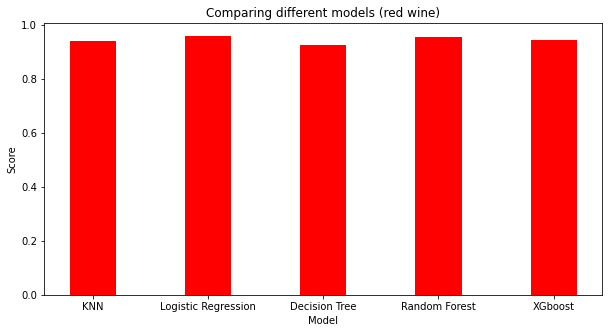

In [22]:
#creating a graph comparing the scores of all three models for the same data sets:
gLabels = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGboost']
gScores = [redKNNScore, redlrScore, redDTreeScore, redRForestScore, redXgbScore]
fig = mp.figure(figsize=(10,5))
mp.bar(gLabels, gScores, color ='red',
        width = 0.4)
mp.xlabel("Model")
mp.ylabel("Score")
mp.title("Comparing different models (red wine)")
mp.show()

In [23]:
dfWhite = pd.read_csv('winequalitywhite.csv')
dfWhite.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [24]:
dfWhite

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [25]:
#Converting the output to binary (good 1/bad 0)
xW = np.arange(4898*11.0).reshape(4898, 11)
yW = np.arange(0,4898)
for i in range(0, 4898):
    if dfWhite.iat[i, 11] < 5:
        yW[i] = 0
    else:
        yW[i] = 1
    for j in range(0, 11):
        xW[i, j] = dfWhite.iat[i, j]


"""
xW = np.arange(4898*11.0).reshape(4898, 11)
yW = np.arange(0,4898)
for i in range(0, 4898):
    yW[i] = dfWhite.iat[i, 11]
    for j in range(0, 11):
        xW[i, j] = dfWhite.iat[i, j]

"""
        
xW = StandardScaler().fit_transform(xW)
print(xW)
print(yW)

XW_train, XW_test, yW_train, yW_test = train_test_split(xW, yW, test_size = 0.25, stratify = yW)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]
[1 1 1 ... 1 1 1]


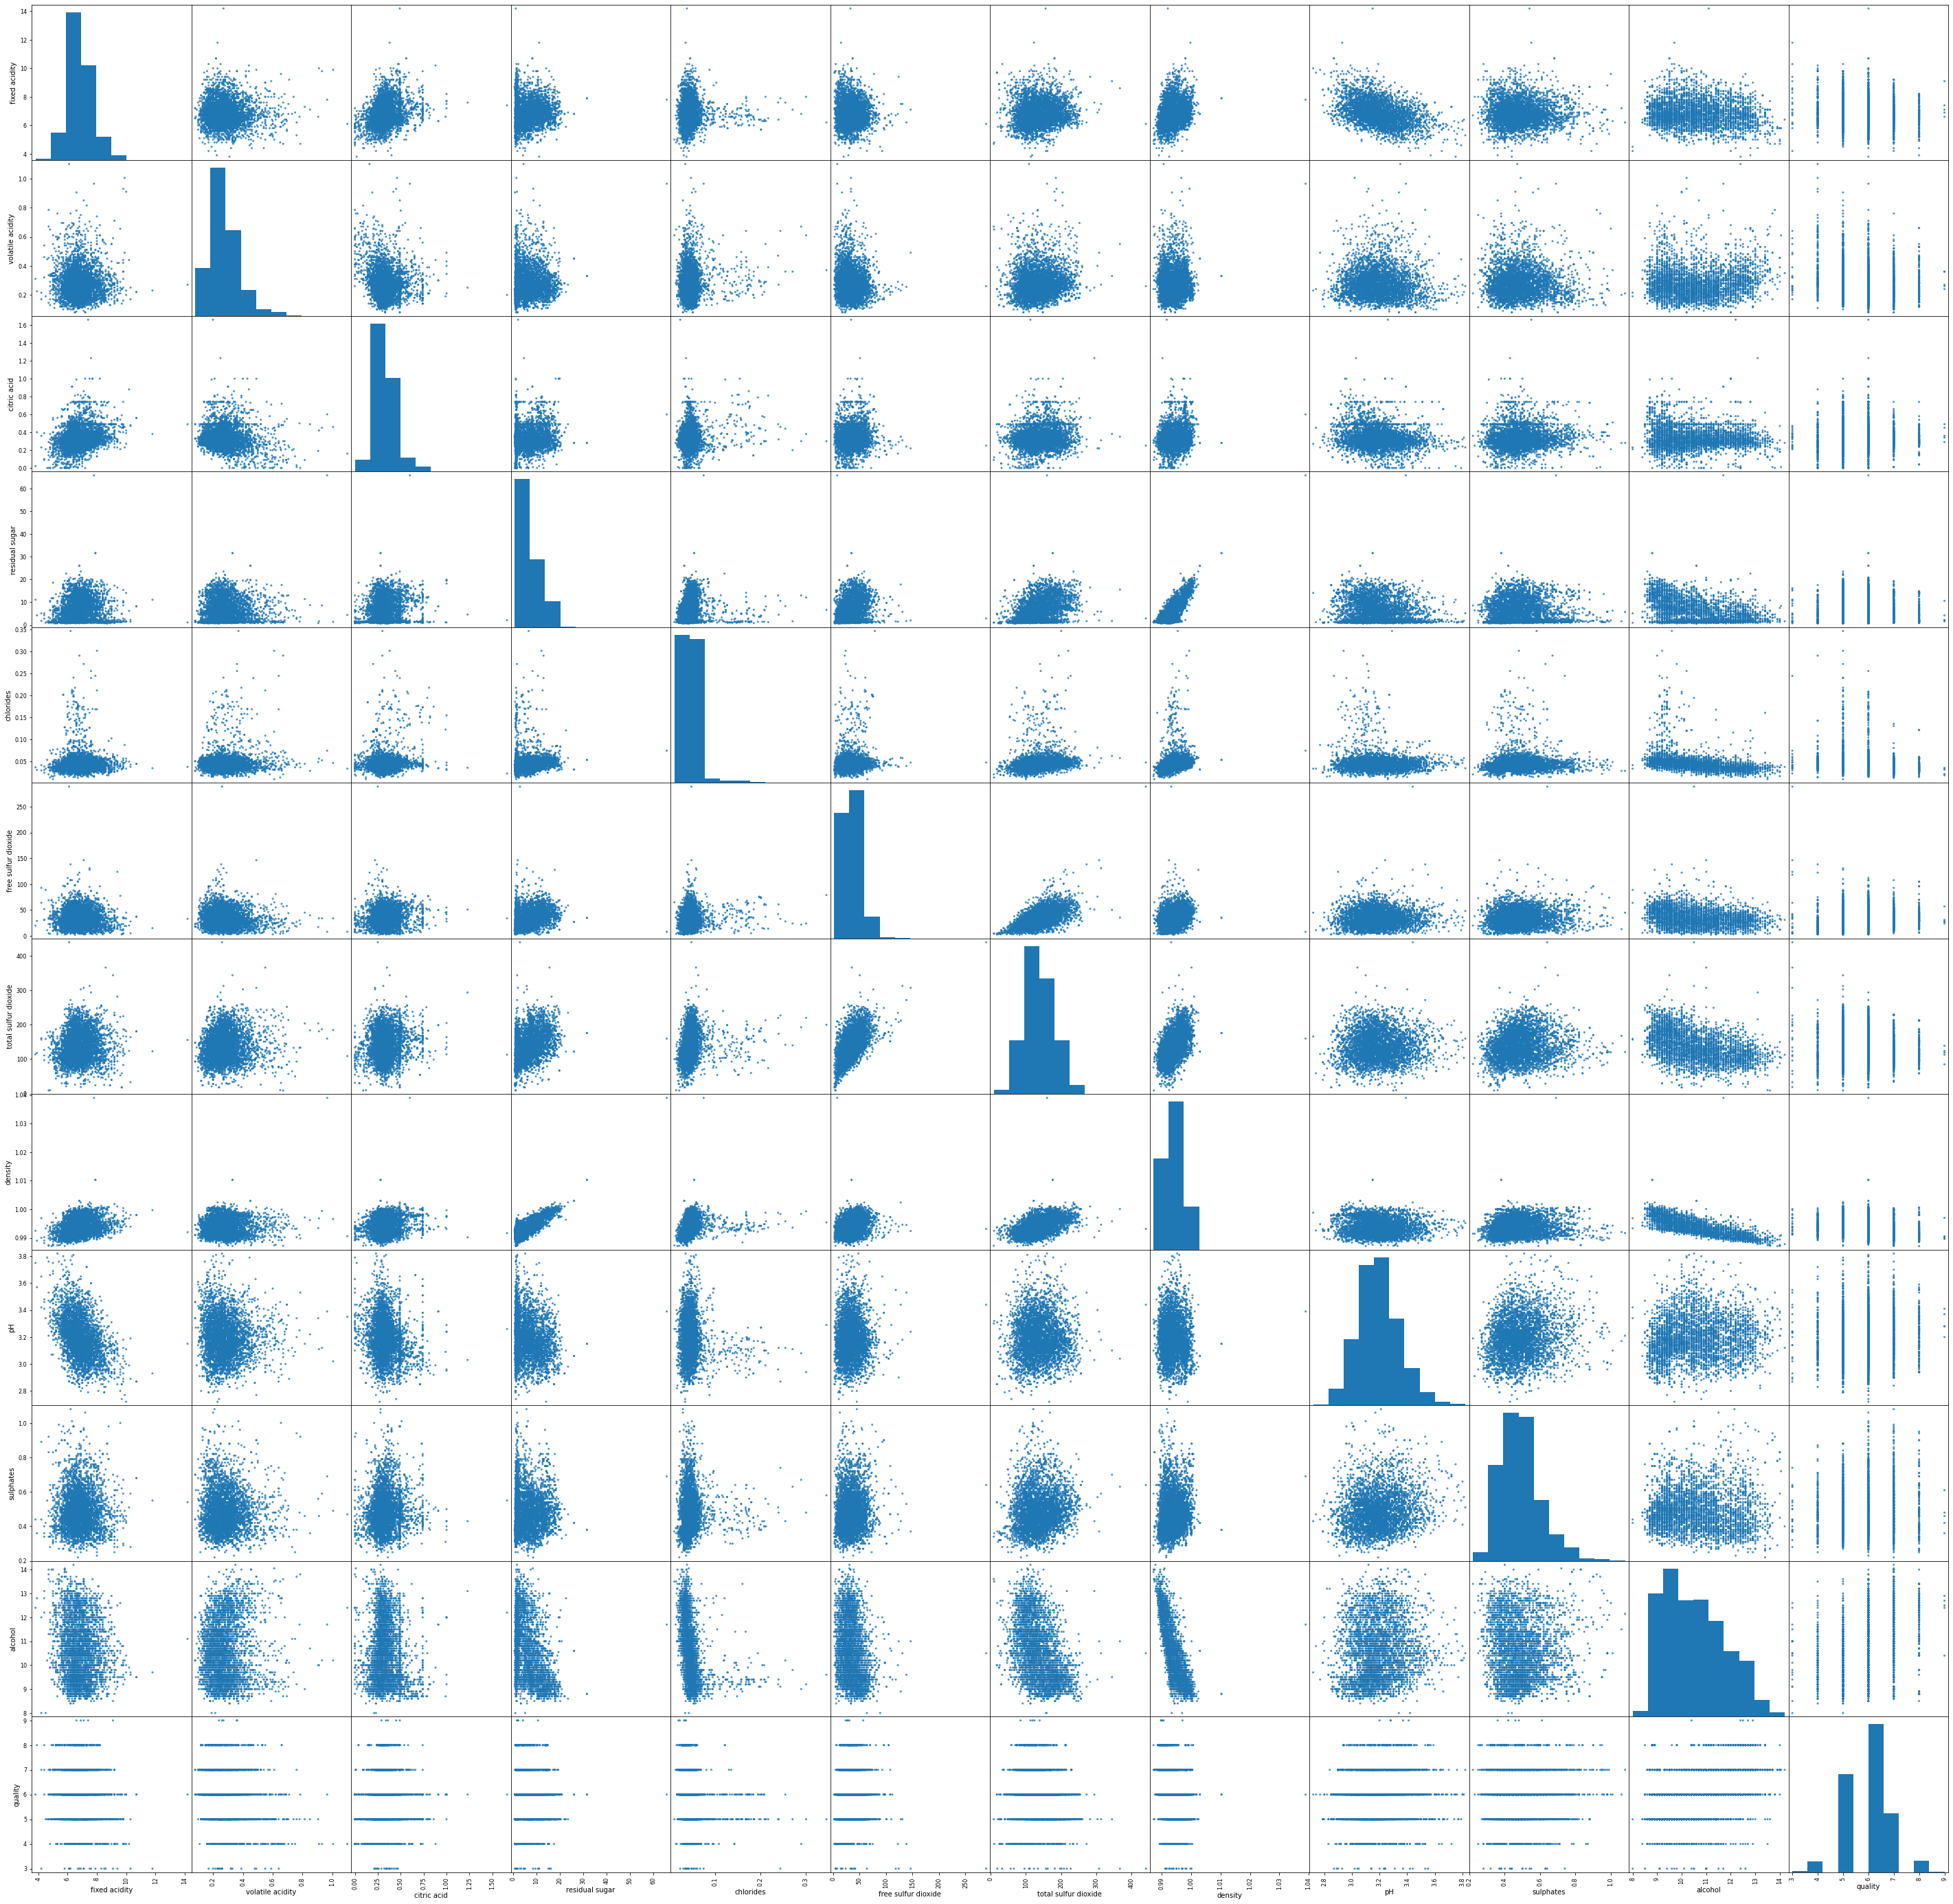

In [26]:
matrixWhite = pd.plotting.scatter_matrix(dfWhite, figsize=(50,50), alpha=0.8)

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(XW_train, yW_train)
yW_predicted = knn.predict(XW_test)
whiteKNNScore = np.mean(yW_predicted == yW_test)
print("Test set score : {:.2f}".format(whiteKNNScore))

Test set score : 0.95


In [28]:
#print(classification_report(yW_test, yW_predicted, labels=[4,5,6,7,8]))
print(classification_report(yW_test, yW_predicted))

              precision    recall  f1-score   support

           0       0.32      0.35      0.33        46
           1       0.97      0.97      0.97      1179

    accuracy                           0.95      1225
   macro avg       0.65      0.66      0.65      1225
weighted avg       0.95      0.95      0.95      1225



In [29]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter=170)
lr.fit(XW_train, yW_train)
yWlr_predicted = lr.predict(XW_test)
whitelrScore = np.mean(yWlr_predicted == yW_test)
print("Test set score : {:.2f}".format(whitelrScore))

Test set score : 0.96


In [30]:
#print(classification_report(yW_test, yWlr_predicted, labels=[3,4,5,6,7]))
print(classification_report(yW_test, yWlr_predicted))

              precision    recall  f1-score   support

           0       0.33      0.02      0.04        46
           1       0.96      1.00      0.98      1179

    accuracy                           0.96      1225
   macro avg       0.65      0.51      0.51      1225
weighted avg       0.94      0.96      0.95      1225



In [31]:
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(XW_train, yW_train)
yWdTree_predicted = dTree.predict(XW_test)
whiteDTreeScore = np.mean(yWdTree_predicted == yW_test)
print("Test set score : {:.2f}".format(whiteDTreeScore))

Test set score : 0.97


In [32]:
#print(classification_report(yW_test, yWdTree_predicted, labels=[3,4,5,6,7,8]))
print(classification_report(yW_test, yWdTree_predicted))

              precision    recall  f1-score   support

           0       0.55      0.52      0.53        46
           1       0.98      0.98      0.98      1179

    accuracy                           0.97      1225
   macro avg       0.76      0.75      0.76      1225
weighted avg       0.97      0.97      0.97      1225



In [33]:
randomForest = RandomForestClassifier(random_state=1)
randomForest.fit(XW_train, yW_train)
yWrf_predicted = randomForest.predict(XW_test)
whiteRForestScore = np.mean(yWrf_predicted == yW_test)
print("Test set score : {:.2f}".format(whiteRForestScore))

Test set score : 0.97


In [34]:
#print(classification_report(yW_test, yWrf_predicted, labels=[4,5,6,7,8]))
print(classification_report(yW_test, yWrf_predicted))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33        46
           1       0.97      1.00      0.98      1179

    accuracy                           0.97      1225
   macro avg       0.82      0.61      0.66      1225
weighted avg       0.96      0.97      0.96      1225



In [35]:
boost = XGBClassifier()
boost.fit(XW_train, yW_train)
yWXgb_predicted = boost.predict(XW_test)
whiteXgbScore = np.mean(yWXgb_predicted == yW_test)
print("\nTest set score : {:.2f}".format(whiteXgbScore))

[11:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Test set score : 0.97


In [36]:
#print(classification_report(yW_test, yWXgb_predicted, labels=[4,5,6,7,8]))
print(classification_report(yW_test, yWXgb_predicted))

              precision    recall  f1-score   support

           0       0.74      0.30      0.43        46
           1       0.97      1.00      0.98      1179

    accuracy                           0.97      1225
   macro avg       0.86      0.65      0.71      1225
weighted avg       0.96      0.97      0.96      1225



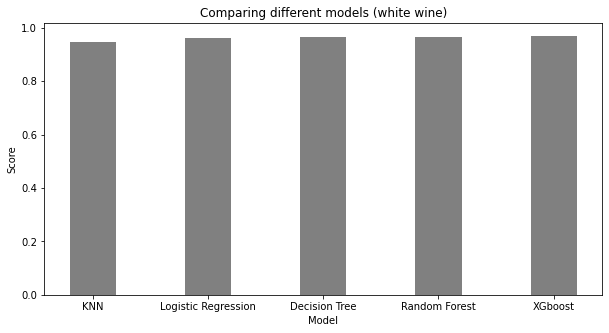

In [37]:
#creating a graph comparing the scores of all three models for the same data sets:
gLabels = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGboost']
gScores = [whiteKNNScore, whitelrScore, whiteDTreeScore, whiteRForestScore, whiteXgbScore]
fig = mp.figure(figsize=(10,5))
mp.bar(gLabels, gScores, color ='grey',
        width = 0.4)
mp.xlabel("Model")
mp.ylabel("Score")
mp.title("Comparing different models (white wine)")
mp.show()

NameError: name 'pd' is not defined